In [1]:
from cpr.Nivel import Nivel
import cpr.information as info

/usr/local/lib/python3.5/dist-packages/wmf/wmf.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/alexa/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/alexa/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/alexa/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/home/alexa/.local/lib/python3.5/site-

TypeError: metaclass conflict: the metaclass of a derived class must be a (non-strict) subclass of the metaclasses of all its bases

In [2]:
self = Nivel(codigo=93,**info.REMOTE)

In [3]:
self.read_sql('show tables;')

,Tables_in_siata
0,datos
1,estaciones


In [4]:
info.LOCAL

{'dbname': 'cpr',
 'host': 'localhost',
 'passwd': 's@mple_p@ss',
 'port': 3306,
 'table': 'estaciones',
 'user': 'sample_user'}

In [14]:
self = Nivel(codigo=90,SimuBasin=True,**info.LOCAL)

In [20]:
from wmf import wmf

In [23]:
wmf.models.show_storage = 0
wmf.models.show_mean_speed = 0
wmf.models.retorno = 1
wmf.models.separate_fluxes = 1
wmf.models.sim_sediments = 0
wmf.models.show_mean_speed = 1
wmf.models.show_speed = 1

In [32]:
inicio = '2015-08-01 00:00:00'
fin = '2015-08-12 00:00:00'
rain_hdr = '/home/alexa/Escritorio/Ejemplo/Campo_radar_08_2015.hdr'

rain_2015 = wmf.read_rain_struct(rain_hdr)
sl1 = rain_2015.index.get_loc(inicio)

sl2=rain_2015.index.get_loc(fin) 
n_intervals = sl2-sl1

Calibracion = [5.0, 2.0, 10.0, 0.0, 0.008, 5.0, 2.3, 2.0, 1.0, 1.0]
rain_rute = '/home/alexa/Escritorio/Ejemplo/Campo_radar_08_2015.bin'

Run = self.run_shia(Calibracion,
             rain_rute,
             N_intervals = n_intervals,
             start_point = sl1,
             EvpVariable = True)

In [36]:
Run[0]

{'Balance': array([-5.68353867e+04,  1.75261387e+04,  1.06843628e+03, -1.91688828e+04,
        -2.68511499e+03, -4.96228467e+03, -2.89847070e+04,  4.12768860e+02,
         9.14173340e+02, -1.65103308e+03,  1.49935364e+03, -1.21453394e+03,
         1.53895984e+03,  1.49155432e+03,  9.87812866e+02,  5.12117554e+02,
         4.84401184e+02,  4.54422852e+02,  1.79224866e+03,  4.48704262e+01,
        -2.88502991e+02,  6.18823433e+00, -1.83049026e+02, -1.40021155e+03,
         2.27011871e+01, -7.43120575e+01, -8.32537918e+01, -1.04127350e+02,
        -1.29364910e+01, -4.96852608e+01, -9.97288147e+02,  4.91571777e+02,
         9.68196228e+02,  1.07043860e+03,  2.12053271e+03,  1.52280090e+03,
         1.81261951e+03,  1.77771277e+03,  8.42548218e+02,  7.07547363e+02,
         8.12434143e+02,  4.27046509e+02, -4.10571136e+02,  1.96090652e+02,
        -1.00167603e+02, -1.64411118e+02, -8.72640198e+02, -2.73282373e+03,
        -3.21451797e+04,  4.45077344e+04, -5.34163094e+01,  1.44224491e+01,
 

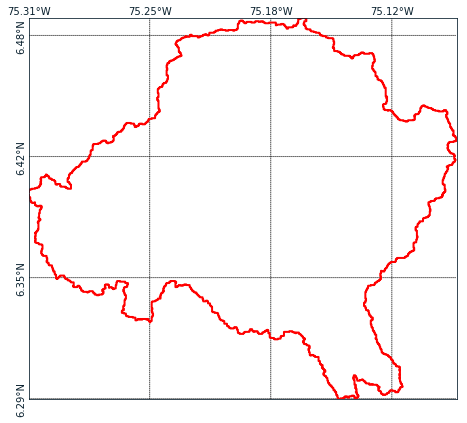

(<mpl_toolkits.basemap.Basemap at 0x7fbab9155090>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbab918e650>)

In [15]:
self.Plot_basin()

In [7]:
start = '2018-04-15 15:00'
end = '2018-04-15 23:00'

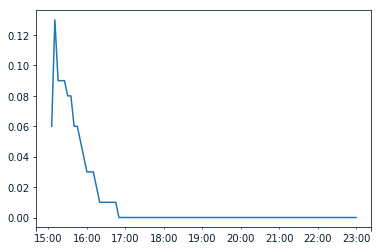

In [8]:
kwargs =  {
        'start':start,
        'end':end,
        'cuenca':self.nc_path,
        'rutaNc':self.radar_path,
        'rutaRes':self.rain_path+self.file_format(start,end),
        'dt':300,
        'umbral': 0.005,
        'verbose':True,
        'super_verbose':True,
        'old':None,
        'save_class':None,
        'store_true':None,
        'save_escenarios':None,
        'store_true':None,
       }

self.radar_rain(start,end).plot()

In [10]:
self.level(start,end)

2018-04-15 15:00:00    50.38
2018-04-15 15:01:00    50.81
2018-04-15 15:02:00    50.59
2018-04-15 15:03:00    51.02
2018-04-15 15:04:00    50.59
2018-04-15 15:05:00    50.28
2018-04-15 15:06:00    51.02
2018-04-15 15:07:00    50.49
2018-04-15 15:08:00    50.70
2018-04-15 15:09:00    50.17
2018-04-15 15:10:00    50.91
2018-04-15 15:11:00    50.81
2018-04-15 15:12:00    50.38
2018-04-15 15:13:00    50.81
2018-04-15 15:14:00    51.02
2018-04-15 15:15:00    50.59
2018-04-15 15:16:00    50.49
2018-04-15 15:17:00    50.38
2018-04-15 15:18:00    50.70
2018-04-15 15:19:00    50.38
2018-04-15 15:20:00    50.38
2018-04-15 15:21:00    49.54
2018-04-15 15:22:00    50.07
2018-04-15 15:23:00    50.49
2018-04-15 15:24:00    49.65
2018-04-15 15:25:00    50.28
2018-04-15 15:26:00    49.75
2018-04-15 15:27:00    50.38
2018-04-15 15:28:00    50.17
2018-04-15 15:29:00    50.59
                       ...  
2018-04-15 22:31:00    48.59
2018-04-15 22:32:00    48.49
2018-04-15 22:33:00    49.12
2018-04-15 22:

In [11]:
self.sensor(start,end)

2018-04-15 15:00:00    906.02
2018-04-15 15:01:00    905.59
2018-04-15 15:02:00    905.81
2018-04-15 15:03:00    905.38
2018-04-15 15:04:00    905.81
2018-04-15 15:05:00    906.12
2018-04-15 15:06:00    905.38
2018-04-15 15:07:00    905.91
2018-04-15 15:08:00    905.70
2018-04-15 15:09:00    906.23
2018-04-15 15:10:00    905.49
2018-04-15 15:11:00    905.59
2018-04-15 15:12:00    906.02
2018-04-15 15:13:00    905.59
2018-04-15 15:14:00    905.38
2018-04-15 15:15:00    905.81
2018-04-15 15:16:00    905.91
2018-04-15 15:17:00    906.02
2018-04-15 15:18:00    905.70
2018-04-15 15:19:00    906.02
2018-04-15 15:20:00    906.02
2018-04-15 15:21:00    906.86
2018-04-15 15:22:00    906.33
2018-04-15 15:23:00    905.91
2018-04-15 15:24:00    906.75
2018-04-15 15:25:00    906.12
2018-04-15 15:26:00    906.65
2018-04-15 15:27:00    906.02
2018-04-15 15:28:00    906.23
2018-04-15 15:29:00    905.81
                        ...  
2018-04-15 22:31:00    907.81
2018-04-15 22:32:00    907.91
2018-04-15

In [13]:
self.level_local(start,end)

DatabaseError: Execution failed on sql 'select fecha,profundidad from myusers_hydrodata where codigo='93' and fecha between '2018-04-15 15:00' and '2018-04-15 23:00';': (1054, "Unknown column 'profundidad' in 'field list'")

In [ ]:
self.read_sql('show tables;')